## Name: Vinayak V Thayil
## Roll No:AM.EN.U4CSE21161

## PART A : Prerequisites for Logistic Regression implementation

1. Plot the attached dataset data1.csv using scatter plot. There is a target feature with discrete
values 0,1. If the target feature is 1, the samples should be shown as red circle. If the target
feature is 0, the samples should be shown as green x

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

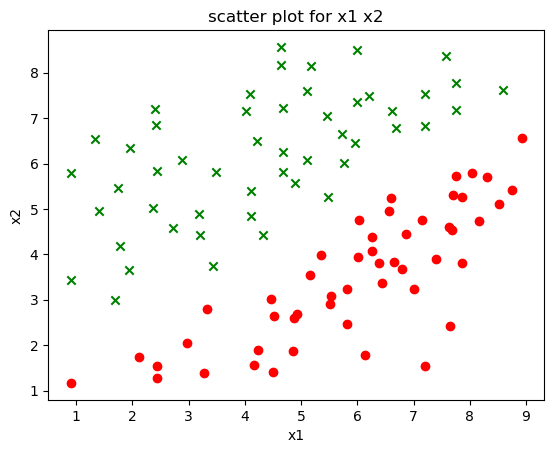

In [5]:
df = pd.read_csv('data1.csv')

target_0 = df[df['y'] == 0]
target_1 = df[df['y'] == 1]

plt.scatter(target_0['x1'],target_0['x2'],color = 'green',marker = 'x', label = 'target_0' )
plt.scatter(target_1['x1'],target_1['x2'],color = 'red', label = 'target_1' )

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter plot for x1 x2')

plt.show()

2. Plot a line y=(2x+3)

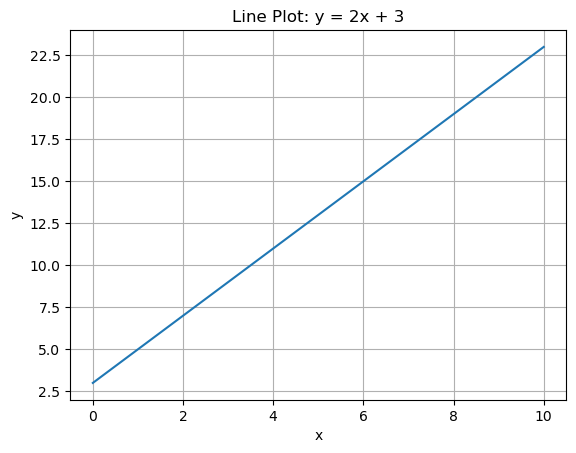

In [6]:
x_val = np.linspace(0,10,100)
y_val = 2*x_val+3

plt.plot(x_val,y_val)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot: y = 2x + 3')
plt.grid('True')

plt.show()

3. Define a function sigmoid(z) that takes one parameter z and computes 1/(1+e^-z). Create a
vector V with 10 values randomly in the range [-1000,1000]. Transform V to V' that
consists of respective sigmoid values using the defined function. Observe the range of
output values in V'

In [7]:
def sigmoid(z):
  return (1/1+np.exp(-z))
v = np.random.uniform(low=-1000 ,high=1000,size=10)
V_prime = sigmoid(v)
print(V_prime)



[6.15933154e+45 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00            inf 1.00000000e+00
 1.00622759e+78 1.00000000e+00]


C:\Users\vinay\AppData\Local\Temp\ipykernel_17712\3745588709.py:2: RuntimeWarning: overflow encountered in exp
  return (1/1+np.exp(-z))


4. Define a function hypothesis(theta, X) that takes two vectors as parameters, theta and X. If
sigmoid(theta.X) >= 0.5, output 0 else output 1.

In [8]:
def hypothesis(theta,X):
  sigmoid_value = sigmoid(np.theta(X,theta))
  if sigmoid_value>=0.5:
      return 0
  else:
        return 1


5. Define a function cost(theta,X,y) to compute the error
 Error = 1/m*Σ-yilog(hθ(xi)) - (1-yi)log(1-hθ (xi))
Where xi is the ith sample and yi is the ith label, hθ(xi) is the hypothesis(theta,xi)

In [9]:
def cost(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    error = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return error

## Part B

6. Implement gradient descent algorithm for logistic regression in data set loan_data.csv.

import training dataset

In [10]:
import pandas as pd
df = pd.read_csv('loan_data.csv')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.shape

(614, 13)

In [13]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History']).median()

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.shape

(542, 13)

In [18]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [19]:
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [20]:
df.Married = df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()


Married
1    355
0    187
Name: count, dtype: int64

In [21]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()


Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [22]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()


Education
1    425
0    117
Name: count, dtype: int64

In [23]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [24]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()


Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [25]:
df['LoanAmount'].value_counts()


LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [26]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [27]:
df['Credit_History'].value_counts()

Credit_History
1.0    542
Name: count, dtype: int64

7. Use sklearn built in function to find the model

In [28]:
X = df.iloc[1:542,1:12].values
Y = df.iloc[1:542,12].values

In [29]:
import numpy as np
class LogisticRegression:
  def __init__(self,x,y):
    self.intercept = np.ones((x.shape[0], 1))
    self.x = np.concatenate((self.intercept, x), axis=1)
    self.weight = np.zeros(self.x.shape[1])
    self.y = y
  def sigmoid(self, x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))
  def loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
  def gradient_descent(self, X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
  def fit(self, lr , iterations):
    for i in range(iterations):
      sigma = self.sigmoid(self.x, self.weight)
      loss = self.loss(sigma,self.y)
      dW = self.gradient_descent(self.x , sigma, self.y)
      self.weight -= lr * dW
  def predict(self, x_new , treshold):
    x_new = np.concatenate((self.intercept, x_new), axis=1)
    result = self.sigmoid(x_new, self.weight)
    result = result >= treshold
    y_pred = np.zeros(result.shape[0])
    for i in range(len(y_pred)):
      if result[i] == True:
        y_pred[i] = 1
      else:
        continue
    return y_pred
regressor = LogisticRegression(X, Y)
regressor.fit(0.1 , 5000)
y_pred = regressor.predict(X, 0.5)
y_imp = y_pred
accuracy_imp = sum(y_pred == Y) / Y.shape[0]
print('Accuracy -> {}'.format(sum(y_pred == Y) / Y.shape[0]))

C:\Users\vinay\AppData\Local\Temp\ipykernel_17712\2670750129.py:12: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
C:\Users\vinay\AppData\Local\Temp\ipykernel_17712\2670750129.py:12: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
C:\Users\vinay\AppData\Local\Temp\ipykernel_17712\2670750129.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy -> 0.6931608133086876


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df.iloc[1:542,1:12].values
Y = df.iloc[1:542,12].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 2)
model = LogisticRegression()
model.fit(X_train,y_train)
lr_prediction = model.predict(X_test)

## PART C: Performance Evaluation of the classifier

8. Compute confusion matrix

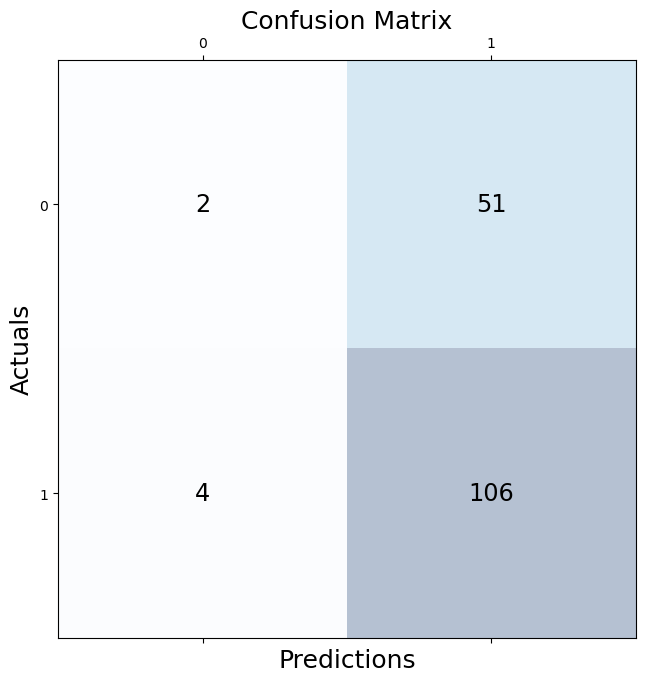

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_prediction)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
  ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


9.Compute the accuracy score

In [33]:
metrics.accuracy_score(lr_prediction,y_test)
accuracy_inb = metrics.accuracy_score(lr_prediction,y_test)


10 - Print a classification report using the following sklearn
function

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        53
           1       0.68      0.96      0.79       110

    accuracy                           0.66       163
   macro avg       0.50      0.50      0.43       163
weighted avg       0.56      0.66      0.56       163



11 - Plot ROC curve for loan status

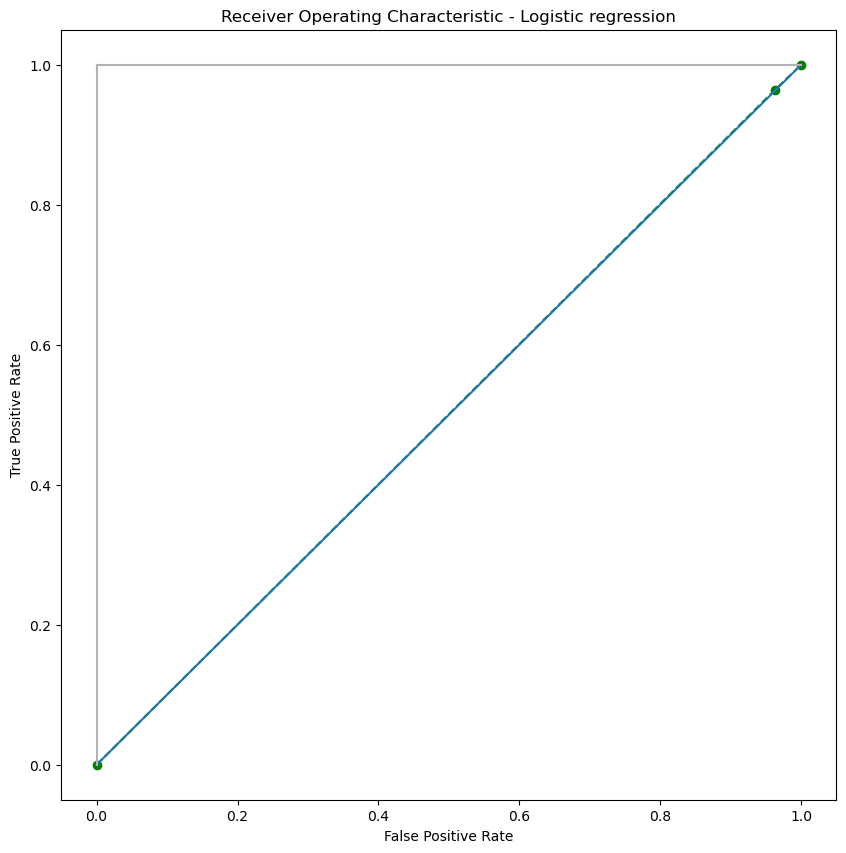

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_prediction)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate,'go--')
plt.plot([0, 1], ls="-")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


12 - Compare the performance of classifiers obtained in 6 and 7

In [39]:
print('Accuracy of implemented model: {}'.format(accuracy_imp))
print('Accuracy of model implemented using In - Built functions: {}'.format(accuracy_inb))

Accuracy of implemented model: 0.6931608133086876
Accuracy of model implemented using In - Built functions: 0.6625766871165644
